In [1]:
df=pd.read_excel("E:\HTL Project\HTL Raw data.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,microalgae,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,open pond,Na2CO3,300,30,130,35.2,37.2,36.0
1,Nannochloropsis,microalgae,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,Flask,H-ZSM5,350,60,180,37.9,42.7,43.0
2,Chlorella vulgaris,microalgae,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,open pond,LiOH,250,60,100,33.8,33.0,33.0
3,Porphyridium purpureum,microalgae,8.5,61.6,18.5,45.6,12.1,NaN,69.1,8.4,...,15.2,0.5,PBR,NaN,250,30,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,microalgae,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,NaN,Na2CO3,375,50,221,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Type']=le.fit_transform(df['Type'])
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])

In [3]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [4]:
x=df.drop('HHV',axis=1)
y=df['HHV']
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
reg1=linear_model.LinearRegression()
reg1.fit(x_train,y_train)
y_pred1 = reg1.predict(x_train)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.1864659662212885


<IPython.core.display.Javascript object>

Root mean square error:  0.00013121664486672187
R2 square:  0.9980182667723684


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.25577790794738736


<IPython.core.display.Javascript object>

Root mean square error:  4.8611581131981796e-29
R2 square:  0.9956540799529058


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

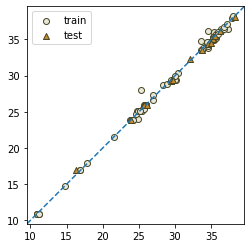

In [5]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/LR hhv 3.png', dpi=300)